# FYSS5120 Efficient Numerical Programming - Demo 4

Author: Felix Cahyadi

Creation date: 02.10.2023

Last changes: -

In [15]:
# import libraries
import math

### 1. Examine the MNIST hand-written number recognition routine from Tensorflow/Keras examples. There are two versions, we’ll look at https://keras.io/examples/vision/mnist_convnet with Convolution, MaxPooling, Flatten, Dropout, and Dense layers. A slightly modified code (added plotting etc.) is in the file keras_mnist.py

I have checked the code, and the keras_mnist.py has the same steps as the one in the website, hence we are going to use the code from keras_mnist.py

I made some modification on the model building part, so that it's going to look for a model file called 'demo4.keras', and load it if it exists. If it doesn't exist, the program is going to build the model, train it, and save the model as 'demo4.keras'

In [16]:
"""
 Trains a simple convnet on the MNIST dataset.
 https://keras.io/examples/vision/mnist_convnet/

"""

# Silence tensorflow import verbose messages
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


# Setup
# -----
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [17]:
# Plotting
# --------

def plot_images(title,images,labels,findings=None):
    """
    title: title of the whole 5x5 plot
    images: set of images to plot, first 25 picked
    labels: set of digits the images are showing
    findings (optional): set of digits the NN thinks he images are showing
    """
    fig,axs = plt.subplots(5,5,figsize=(8,8))
    plt.suptitle(title)
    k = 0
    for i in range(5):
        for j in range(5):
            axs[i,j].axis('off')
            try:
                axs[i,j].imshow(images[k], cmap='Greys')
                
                try:
                    axs[i,j].set_title(f'{labels[k]} not {findings[k]}')
                except:
                    axs[i,j].set_title(f'{labels[k]}')
                k+=1
            except:
                pass
                
    plt.show()

In [18]:
# Model / data parameters
# -----------------------
num_classes = 10
input_shape = (28, 28, 1)

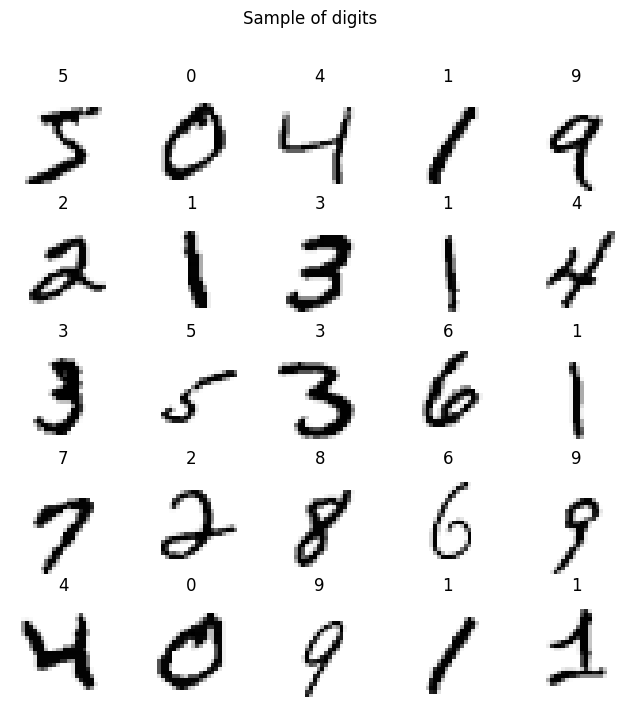

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
# Read in the data
# ----------------
# split between train and test sets
#
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
plot_images('Sample of digits',x_train,y_train)

# Scale images to the [0, 1] range
x_train = x_train/255
x_test = x_test/255

# x shape is (:,28,28), need (:,28,28,1); add an extra dimension to the end
# images should  have shape (28, 28, 1)
x_train = x_train[...,np.newaxis] # notice the use of the ellipsis ...
x_test = x_test[...,np.newaxis]

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
# retrieve or Build the model
# ---------------
try:
    # Try to look for model
    model = keras.models.load_model('demo4.keras')
    model.summary()

except:
    model = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
        ]
    )

    model.summary()
    # Train the model
    # ---------------
    batch_size = 128
    epochs = 15

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save('demo4.keras')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [21]:
# Evaluate the trained model
# --------------------------
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026720169931650162
Test accuracy: 0.9911999702453613


### 2. What’s the purpose of these layer types?
* Convolution
* Flatten

First, we are going to answer the purpose of the convolution layer

In [22]:
# Create a function to plot images in lines
def plot_straight_imag(images, title = None):
    # get the number of images to plot
    if images.shape[0]<5:
        nrow = 1
        ncol = images.shape[0]
    else:
        nrow = math.ceil(images.shape[0]/5)
        ncol = 5
    


    fig, axs = plt.subplots(nrows=nrow,ncols=ncol,figsize = (nrow,ncol))

    try:
        for i in range(nrow):
            for j in range(ncol):
                try:
                    axs[i,j].imshow(images[(5*i)+j],cmap = 'Greys')
                    axs[i,j].axis('off')
                except:
                    axs[i,j].axis('off')
    except:
        try:
            for i in range(nrow):
                axs[i].imshow(images[i],cmap = 'Greys')
                axs[i].axis('off')
        except:
            axs.imshow(images[0],cmap = 'Greys')
            axs.axis('off')
            
    try:
        fig.suptitle(title)
    except:
        pass
    

    plt.show()

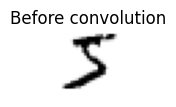

In [23]:
# we are going to test what the layers are doing
x_sample = x_train[:1] # Take the first sample from training data
plot_straight_imag(x_sample,'Before convolution')

In [24]:
conv_sample = layers.Conv2D(32,kernel_size = (3,3), activation = "relu")(x_sample)

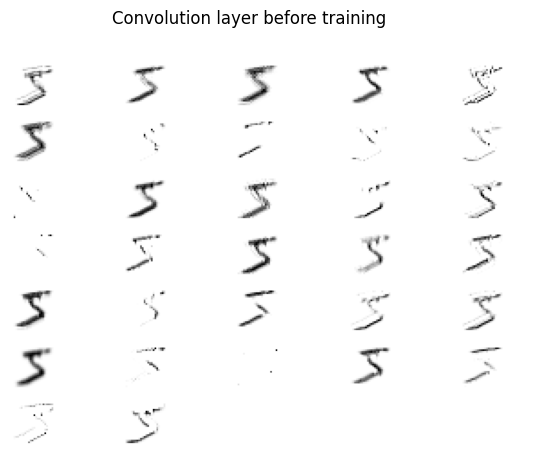

In [35]:
plot_straight_imag(np.transpose(np.array(conv_sample[0,...,:]),(2,0,1)), 'Convolution layer before training')

Here, we can see that the convolution layer applies 32 different filters to the input, each of them are shaped as 3x3 arrays. These filters are then used to produce what we call as feature maps. When first created, the filters are initialized randomly.

I think each feature maps are meant to 'separate' the feature of the input, so that the CNN can learn better based on those features.

Usually after applying filter operation, we can put it through activation function to introduce nonlinearity.

In [32]:
# Extract layer from the trained model, and apply it to our sample
trained_conv = model.get_layer('conv2d_3')(x_sample)

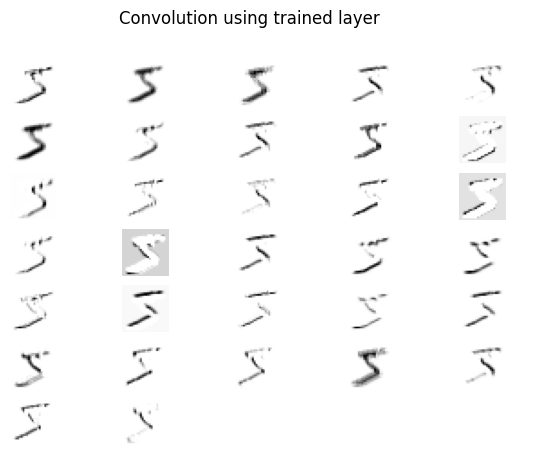

In [36]:
# Plot the result from the trained layer
plot_straight_imag(np.transpose(np.array(trained_conv[0,...,:]),(2,0,1)), 'Convolution using trained layer')

We can see that the trained layer distinguish some features better, some of them are recognizing the background, some of them recognize the edges, some of them the insides.

Next, we will discuss the flatten layer. Because the goal of this NN is to recognize numbers, we are going to pass the output from the CNN to the ANN. CNN is used to separate the features from an image, and ANN does the classification/prediction. In order to "connect" the CNN to the ANN, we need to turn the multidimensional layer to 1 dimensional layer. That's where the flatten layer comes in. In the code below, we can see that from max_pooling2d_3 with the shape of (5,5,64) into (1600)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             